### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read California housing prices csv

In [2]:
data = pd.read_csv("/workspaces/california_housing_prices/data/housing.csv")

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Describe dataset

There are missing data only for **total_bedrooms** column

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [8]:
data.describe().apply(lambda x: x.apply("{0:,.2f}".format)).T

,count,mean,std,min,25%,50%,75%,max
longitude,"20,640.00",-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,"20,640.00",35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,"20,640.00",28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,"20,640.00","2,635.76","2,181.62",2.00,"1,447.75","2,127.00","3,148.00","39,320.00"
total_bedrooms,"20,433.00",537.87,421.39,1.00,296.00,435.00,647.00,"6,445.00"
population,"20,640.00","1,425.48","1,132.46",3.00,787.00,"1,166.00","1,725.00","35,682.00"
households,"20,640.00",499.54,382.33,1.00,280.00,409.00,605.00,"6,082.00"
median_income,"20,640.00",3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,"20,640.00","206,855.82","115,395.62","14,999.00","119,600.00","179,700.00","264,725.00","500,001.00"


In [41]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Grid Histogram

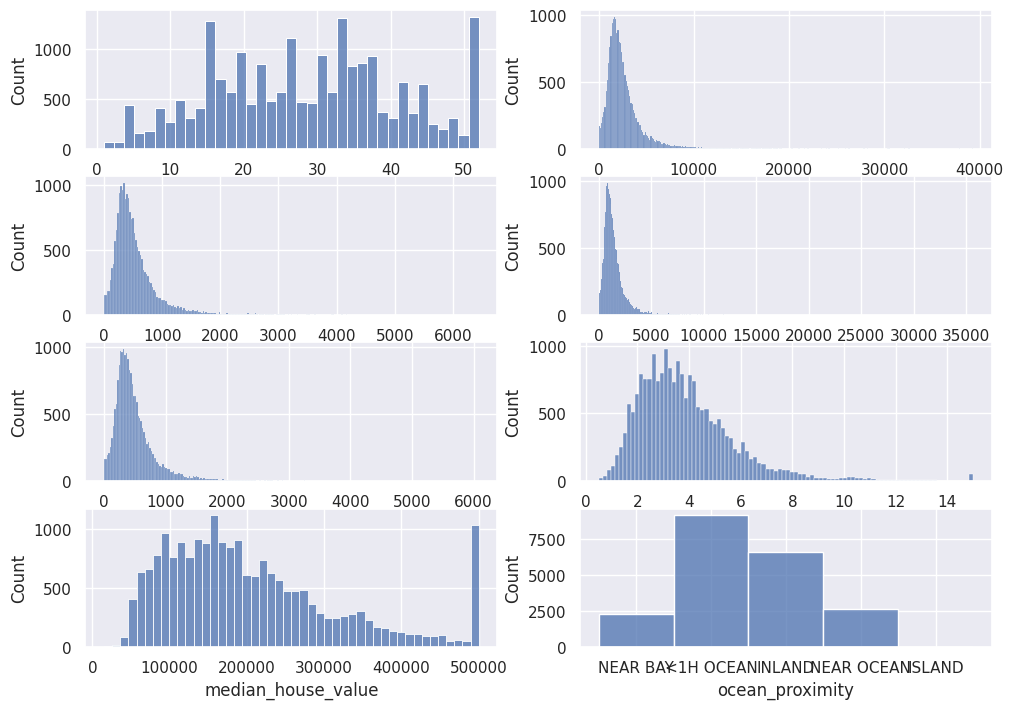

In [31]:
sns.set_theme(rc={"figure.figsize":(11.7, 8.27)})

fig, axes = plt.subplots(4, 2)
axes = axes.flatten()

cols_to_plot = data.columns[2:]

for num, col in enumerate(cols_to_plot):
    ax = sns.histplot(x=data[col], ax=axes[num], kde=False)



### Examine missing data

- 1% of total records contains missing data on "total_bedrooms" column
- No pattern found on missing data

In [50]:
missed_data = data[data["total_bedrooms"].isna()]

num_missing_data = missed_data.shape[0]
print(f"Number of missing data: {num_missing_data}")
print(
    f"""Proportion of missing data: {num_missing_data} / {data.shape[0]} = {
        round((num_missing_data/data.shape[0]) * 100, 2)
        }%""",
    )

missed_data.describe().apply(lambda x: x.apply("{0:,.2f}".format))

Number of missing data: 207
Proportion of missing data: 207 / 20640 = 1.0%


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.00,207.00,207.00,207.00,0.00,207.00,207.00,207.00,207.00
mean,-119.47,35.50,29.27,"2,562.60",nan,"1,477.77",510.02,3.82,"206,007.28"
std,2.00,2.10,11.96,"1,787.27",nan,"1,057.45",386.12,1.96,"111,638.21"
min,-124.13,32.66,4.00,154.00,nan,37.00,16.00,0.85,"45,800.00"
25%,-121.81,33.97,19.00,"1,307.50",nan,781.00,258.00,2.56,"128,750.00"
50%,-118.49,34.20,30.00,"2,155.00",nan,"1,217.00",427.00,3.41,"175,000.00"
75%,-117.98,37.49,38.00,"3,465.00",nan,"1,889.50",628.00,4.62,"267,700.00"
max,-114.59,40.92,52.00,"11,709.00",nan,"7,604.00","3,589.00",15.00,"500,001.00"


In [40]:
missed_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: count, dtype: int64